
# Embedding, Clustering & Annotation - Endocrine Cells
Michael Sterr

2021-06-09 14:38:16      


# Setup

Run following scripts before:
 * scRNA-seq_iPSC_IIR-KO_Embedding-Clustering-Annotation_S6-Only_All-Cells.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import moscot

2022-06-23 12:05:41.570023: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 12:05:41.633706: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 12:05:41.637794: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [3]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.sparse import csr_matrix
import scipy

# Load data

### Load data to annotate

In [4]:
# I use this data as I cannot find "E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN"
adata=sc.read('/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad')

In [5]:
for layer in adata.layers:
    if not scipy.sparse.issparse(adata.layers[layer]):
        adata.layers[layer] = csr_matrix(adata.layers[layer])

### Load annotated data

In [6]:
adata_annotated = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


# Define marker genes

In [7]:
# Marker genes mouse pancreas (pair-wise)
marker_genes_mouse = dict()
marker_genes_mouse['Mat. Acinar'] = ['Arhgdig','Ass1','Cckar','Cel','Cela1','Cldn10','Dhx34','Edem1','Edem2','Erp27','Fkbp11','Gamt','Gcat','Gstm1','Mt1','Nupr1','Pnliprp1','Rbpjl','Reep5','Serpini2','Spink1','Tmem97']
marker_genes_mouse['Trunk'] = ['Actb']
marker_genes_mouse['Prlf. Trunk'] = ['H2afz']
marker_genes_mouse['Ngn3 high EP'] = ['Btbd17','Cbfa2t3','Cotl1','Gadd45a','Hes6','Mtch1','Neurog3','Ppp1r14a','Smarcd2','Tmsb4x']
marker_genes_mouse['Fev+'] = ['Fev', 'Krt7']
marker_genes_mouse['Beta'] = ['1110008P14Rik', 'Gng12', 'Mafb', 'Papss2']
marker_genes_mouse['Alpha'] = ['BC048546', 'Peg10', 'Slc38a5', 'Tmem27', 'Ttr', 'Tmsb15l']
marker_genes_mouse['Delta'] = ['Cd24a', 'Hhex', 'Pyy', 'Rbp4', 'Sst']
marker_genes_mouse['Epsilon'] = ['Ghrl', 'Maged2', 'Mboat4']
marker_genes_mouse['Multipotent'] = ['Npm1', 'Ppia']
marker_genes_mouse['Acinar'] = ['Car9','Cbs', 'Cckar','Cel','Cela1','Cldn10','Edem1','Erp27','Gamt','Gcat','Gstm1','Igf1','Nupr1','Ptf1a','Rbpjl','Reep5','Serpini2','Tmem97']
marker_genes_mouse['primary Alpha'] = ['Sct', 'Slc38a5']
#marker_genes_mouse[] = []

# Marker genes mouse pancreas unique versus rest
marker_genes_mouse2 = dict()
marker_genes_mouse2['Multipotent'] = ['Eef2', 'Rpl38', 'Rpl22', 'Rpl7a', 'Eef1b2', 'Btf3', 'Gnb2l1', 'Pabpc1']
marker_genes_mouse2['Tip'] = ['Smco4', 'Bzw2', 'Gcsh', 'Nme4', 'Cpn1', 'Mpp6', 'Gpc3', 'Tcf15', 'Capn6', 'Nop56', 'Trp53', 'Sdc1', 'Afp', 'Cdca7', 'Hyal2', 'Nrp1', 'P2rx1', 'Ccnd2', 'Jam3', 'Myc', 'Prss23', 'Ccdc30', 'Trf', 'Tnfaip8', 'Gulo', 'Dkc1', 'Fermt1', 'Vtn', 'Cda', 'Fbl', 'Zfp503', 'Rhov', 'Gsto1', 'Acvr2b', 'Noxa1', 'Id3', 'Apoe', 'Chst2', 'Ogfrl1', 'Sdpr', 'Nipsnap1', 'Ung', 'Hmgb3', 'Ruvbl1', 'Sez6', 'Igf2bp1', 'Igfbp4', 'Frem2', 'Flrt2', 'Dcakd', 'Mest', 'Cdca7l', 'Ppif', 'Dctd', 'Atic', 'Paics', 'Fbln1', 'Kirrel2', 'Rcbtb2', 'Gc', 'Dusp9', 'Car14', 'Hmga1-rs1', 'Hmga1', 'Phgdh', 'Gnl3', 'Stmn1', 'Dctpp1', 'Gar1', 'Matn4', 'Serf1', 'Rcn3', 'Ruvbl2', 'Sept9', 'Fzd2', 'Wdr77', 'Trim28', 'Pltp', 'Bmp7', 'Igfbp2', 'Shmt1', 'Crabp1', 'Mcm7', 'Etv4', 'Prdx6', 'Fam60a', 'Pcbp4', 'Apex1', 'C1qbp', 'Rcan2']
marker_genes_mouse2['Prlf. Tip'] = ['Cdca7l', 'Ccnf', 'Mpp6', 'Nasp', 'Cdca4', 'Eme1', 'Rad51ap1', 'Ncaph', 'Ezh2', 'Cdca5', 'Skp2', 'Vrk1', 'Exo1', 'Ube2t', 'Dut', 'Hist1h2ae', 'Trip13', 'Kif22', 'Cenpn', 'Rrm1', 'Fam64a', 'Kif2c', 'Dscc1', 'Mns1', 'Aars', 'Pcna', 'Mcm7', 'Cenpw', 'Fignl1', 'Rcc1', 'Clspn']
marker_genes_mouse2['Trunk'] = ['mt-Co2', 'H2afz', 'Notch2', 'Hmgn1', 'Hnrnpa1', 'Rpgrip1', 'mt-Co3', 'mt-Nd1']
marker_genes_mouse2['Prlf. Trunk'] = ['Supt16', 'Hmgn2', 'Sumo2', 'Ran', 'Ranbp1', 'Hmgn1', 'Dynll1', 'Hnrnpa1', 'Rpgrip1', 'H2afz', 'Anp32b']
marker_genes_mouse2['Prlf. Acinar'] = ['Pigf', 'Suclg2', 'Pla1a', 'Akr1c13', 'Ddc', 'Uchl5', 'Add3', 'Pa2g4', 'Gart', 'Gata4', 'Galk1', 'Lyar', 'Tinag', 'Vars', 'Gar1', 'Tex30', 'Wdtc1', 'Ifrd2', 'Mthfd1', 'Pold2', 'Atad3a', 'Phlda1', 'Ptn', 'Igf2', 'Umps', 'Aldh1b1', 'Slc38a3', 'Plk2', 'Akap7']
marker_genes_mouse2['Mat. Acinar'] = ['Try10', 'Clps', 'Tram1', 'C1qa', 'Ssr1', 'Prss1', 'Dap', 'Tspan13', 'Atp5g1', 'Bhlha15', 'Car9', 'Cela3b', 'Bcat2', 'Ldha', 'Arhgdig', 'Dhrs7', 'Rexo2', 'Ssr4', 'Ass1', 'Ppib', 'Ang', 'Lgals1', 'Tob1', 'Fabp5', 'Ttc23', 'Sel1l', 'Lin37', 'Tmed3', 'P4hb', 'Pdia2', 'Ostc', 'Herpud1', 'Dnajc3', 'Tmem147', 'Clu', 'Rap1gap', 'Rps27l', 'Kctd14', 'Fkbp2', 'Serp1', 'Mlec', 'Sephs2', 'Sdf2l1', 'Edem1', 'Edem2', 'Krtcap2', 'Aqp8', 'Sepp1', 'Tmem238', 'Try5', 'Dhx34', 'Msrb1', 'Bckdk', 'Fam46c', 'Erp27', 'Vimp', 'Mrps24', 'Rrbp1', 'Gm15915', 'Cpb1', 'Rnase4', 'Fkbp11', 'Cela2a', 'Prss2']
marker_genes_mouse2['Ductal'] = ['Hpgd', 'Rassf10', 'Fmo2', 'Ugt2b34', 'Cdc42ep1', 'Gm266', 'Fjx1', 'Trip6', 'Slco3a1', 'Cited1', 'Cadm1', 'Gpt2', 'Rhob', 'Rxrg', 'Igsf3', 'Sphk1', 'Fam89a', 'Ctsh', 'Nrarp', 'Mycn', 'Tubb2b', 'Nav2', 'Ajuba', 'Ncald', 'Akr1cl', 'Eno1', 'S100a16', 'Cnn3']
marker_genes_mouse2['Prlf. Ductal'] = ['Kif11', '2700094K13Rik', 'Dnajc9', 'Ccdc34', 'Cited1', 'Slco3a1', 'Cadm1', 'Melk', 'Kif23', 'Kif20a', 'Nuf2', 'Nrarp', 'Tuba1c', 'Bub3', 'Mki67', 'Asf1b', 'Mxd3']
marker_genes_mouse2['Ngn3 low EP'] = ['Gas2', 'Fndc5', 'Dbi', 'Fabp3', 'Ptprf', 'Cxcl12', 'Tmem171', 'Fam159a', 'Igf1r', 'Nrtn', 'Crp', 'Grin3a', 'Trim47', 'Mia', 'Enpp2', 'Ndrg2', 'Slc28a3', 'Lamb1', 'Kcnk1', 'Zfhx3', 'Eps8l2', 'Gal3st1', 'Mesdc1', 'Slc2a2', 'Ckb', 'Rbms3', 'Krt18', 'Wapl', 'Anxa5']
marker_genes_mouse2['Ngn3 High early'] = ['Spsb4', 'Kdm1a', 'Pard3', 'Gm8773', 'Fgd2', 'Rasl11b', 'Enc1', 'Tpm4', 'Gtf2a2', 'Agap3', 'Sox11', 'Phc2', 'Lrrn2', 'Glrx3', 'Csnk1e', 'Ssbp3', 'Ppp1r14b', 'Plk3', 'Chd7', 'Steap1']
marker_genes_mouse2['Ngn3 High late'] = ['Ly6e', 'Ifitm2', 'Swt1', 'Hspa8', 'Rnf114', 'Traf4', 'Shf', 'Tpst2', 'Sulf2', 'Sult2b1', '2010107G23Rik', 'Prdx2', 'Eif3f']
marker_genes_mouse2['Fev+ Beta'] = ['Nisch', 'Clta', 'Npepl1', 'Cox7a2l']
marker_genes_mouse2['Beta'] = ['Papss2', 'Ins2', 'Mien1', 'Ece1', 'Nnat', 'Mlxipl', 'Entpd3', 'Gjd2', 'Atp6v1e1', 'Pcsk1', 'Sec61b', 'Immp1l', 'Pdx1', 'Atp2a2', 'Ociad2']
marker_genes_mouse2['Fev+ Alpha'] = ['Cd164l2', 'Dst', 'Irf2bpl', 'Gm43861', 'Gnai2', 'Pnmal1', 'Klhl7', 'Tekt2', 'Qdpr', 'Zwint']
marker_genes_mouse2['primary Alpha'] = ['Dnajc12', 'Asb4', 'Uqcc2', 'Ptprn', 'Wnk3', 'Cd81', 'Ly6h', 'Emc10', 'Edn3', 'Slc14a2', 'Ndufv3', 'Atp6v0e2', 'Dohh', 'Nudt11', 'Mapk15', 'Rab37', '2210013O21Rik', 'Ctsz', 'Nap1l5', 'Syt7', 'Tma7', 'Snrpn', 'Gm11716', 'Basp1', 'Sgce']
marker_genes_mouse2['secondary Alpha'] = ['Ncam1', 'Sphkap', 'Sez6l2', 'Ush1c']
marker_genes_mouse2['Alpha'] = ['Dnajc12', 'Irx1', 'Ttr', 'Ndn', 'Wnk3', 'Ncam1', 'Resp18', 'Sct', 'Gcg', 'BC048546', 'Tmsb15l', 'Efcab1', 'Tmsb15b2', 'Sphkap', 'Ush1c', 'Dock11']
marker_genes_mouse2['Fev+ Pyy'] = ['Gde1', 'Pgrmc1', 'Fam216a', 'Rsrp1', 'Mbnl2', 'Pou3f4', 'Usp18', 'Gprasp2']
marker_genes_mouse2['Fev+ Delta'] = ['Yipf4', 'Camk2n2', 'Ppp2r5b', 'B630019K06Rik', 'Dctn3']
marker_genes_mouse2['Fev+ Epsilon'] = ['Tmem184c', 'Psmc2', 'Spint1', 'Ubl3', 'Sdcbp', 'Pclo', 'Lpcat3', 'Hpca', 'Cer1', 'Drap1', 'Lrrc42', 'Ppp3ca', 'Abhd15']
marker_genes_mouse2['Delta'] = ['Pld3', 'Frzb', 'Auts2', 'Kcnmb2', 'Sst', 'Cd24a', 'Smim14', 'Manf', 'Spcs2', 'Fam46a', 'Th', 'Ramp1', 'PISD', 'Kctd8', 'Hadh', 'Ssr2', 'Ddost', 'Erp29', 'Fam159b', 'Ppp1r14c', 'Ywhaq']
marker_genes_mouse2['Epsilon'] = ['Maged2', 'Txndc12', 'Prdx5', 'Cd164', 'Gng4', 'Pnmal2', 'Card19', 'Fam174a', 'Gm11837', 'Lrrtm3', 'Sin3b', 'Alcam', 'Ghrl', 'Lamp1', 'Fhl2', 'Anpep', 'Rbpms', 'Atraid']


# Run Leiden algorithm
Therefore, we need a neighbor graph. This was obtained by Seurats WNN.

We want to have a fine clustering because we can still merge clusters later.

In [8]:
sc.tl.leiden(adata, resolution=1.4, key_added='leiden_r_1.4')
sc.tl.leiden(adata, resolution=1.8, key_added='leiden_r_1.8')
sc.tl.leiden(adata, resolution=3, key_added='leiden_r_3.0')
sc.tl.leiden(adata, resolution=4, key_added='leiden_r_4.0')

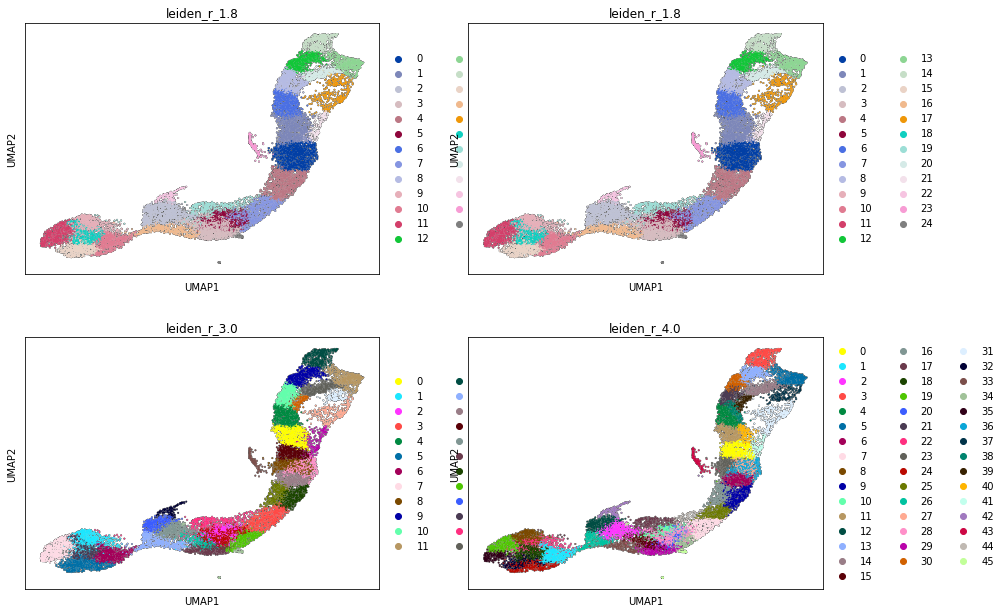

In [9]:
sc.pl.umap(adata, color=['leiden_r_1.8', 'leiden_r_1.8', 'leiden_r_3.0', 'leiden_r_4.0'], size=8, add_outline=True, alpha=1, outline_width=(0.2, 0.0), ncols=2)

We check whether quality of all clusters is ensured, obviously on the finest clustering

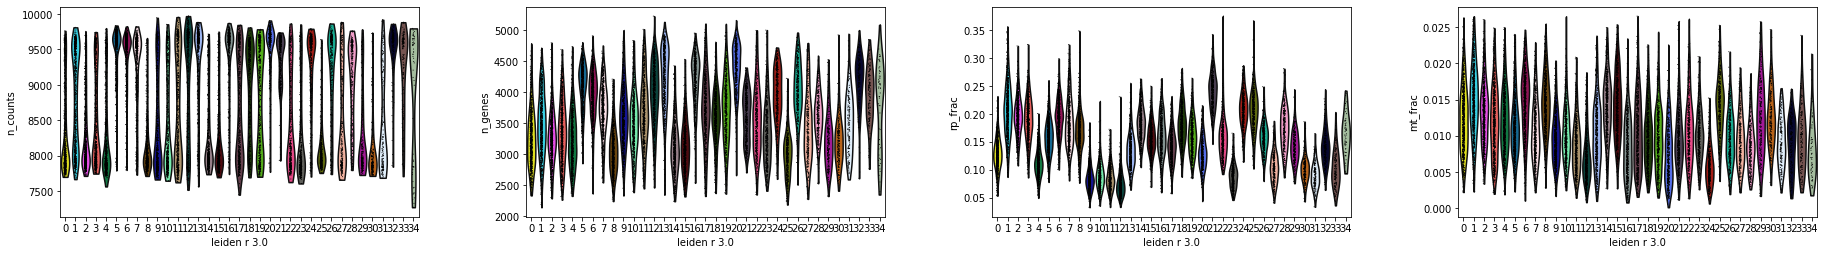

In [10]:
sc.pl.violin(adata, use_raw=False, keys=['n_counts','n_genes','rp_frac','mt_frac'], groupby='leiden_r_3.0')

### Determine which annotations to use

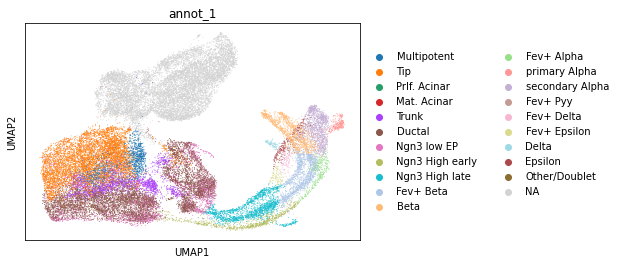

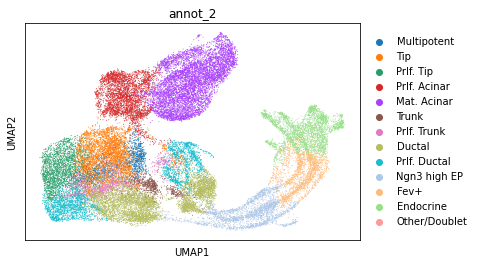

In [11]:
adata_annotated.obs["annot_1"] = adata_annotated.obs["clusters_fig6_alpha_final"].copy()
adata_annotated.obs["annot_2"] = adata_annotated.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_annotated, color=["annot_1"])
sc.pl.umap(adata_annotated, color=["annot_2"])

In [12]:
adata_annotated.obs["celltype"] = np.where(~pd.isnull(adata_annotated.obs["annot_1"]), adata_annotated.obs["annot_1"], adata_annotated.obs["annot_2"])
pd.isnull(adata_annotated.obs["celltype"]).sum()

0

In [13]:
adata_annotated.obs["celltype"] = adata_annotated.obs["celltype"].astype("category") # this is needed for moscot

# Use moscot for label transfer

In [14]:
from moscot.problems.label_transfer import LabelProblem

In [15]:
lp = LabelProblem(adata_annotated, adata)

In [16]:
lp = lp.prepare(key_labelled={"day": ("14.5", "15.5")}) # takes a while because computes PCA

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(


In [17]:
lp = lp.solve(epsilon=1e-2, scale_cost="mean", tau_a=0.8, tau_b=0.99)

2022-06-23 12:09:20.953215: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 12:09:20.953257: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

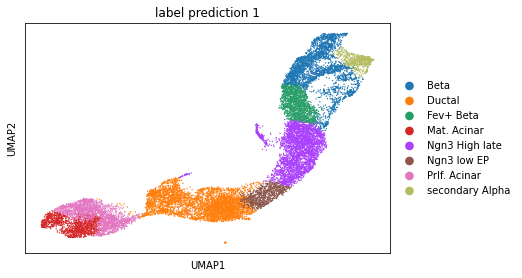

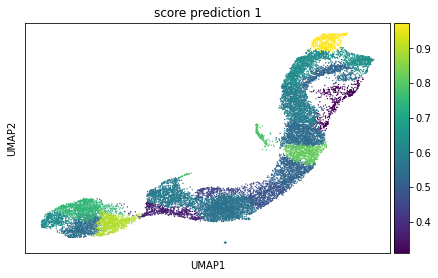

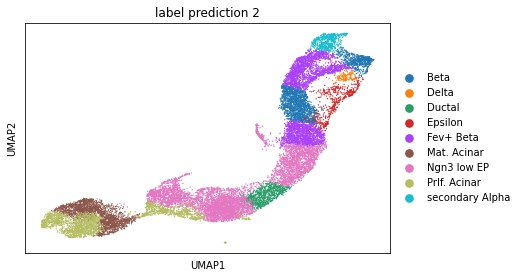

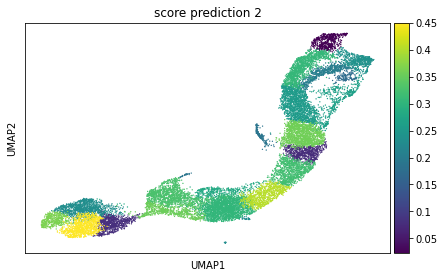

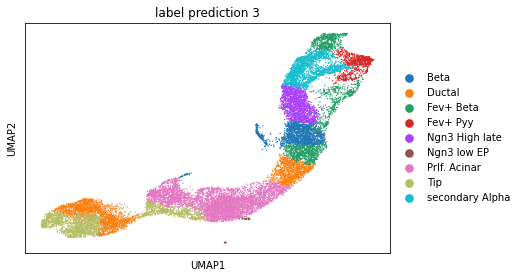

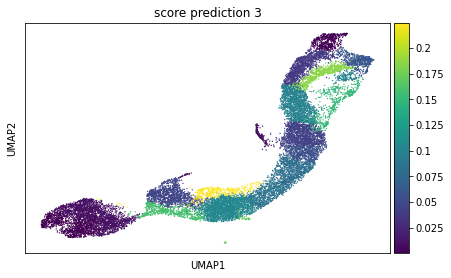

In [18]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.4", top_k=3)

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

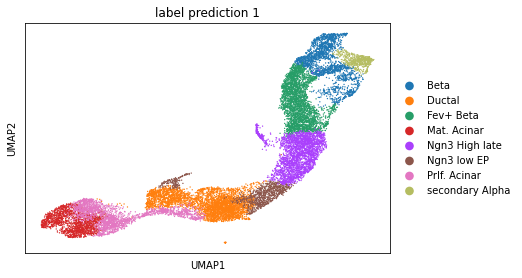

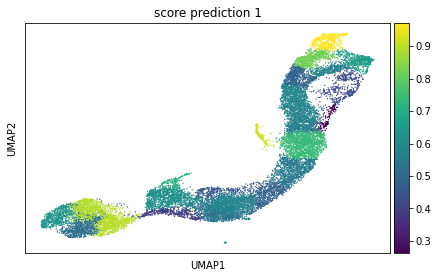

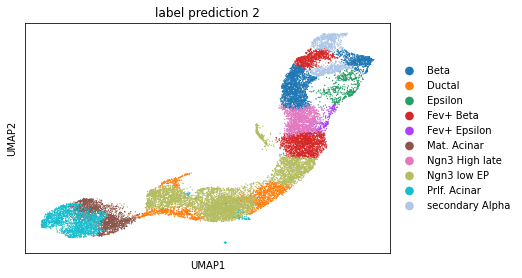

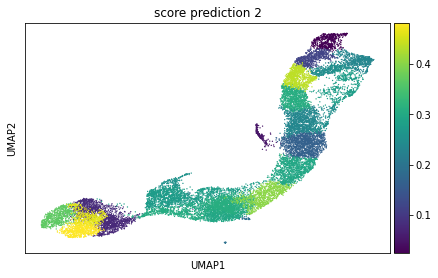

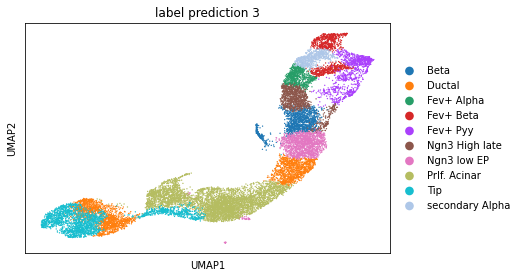

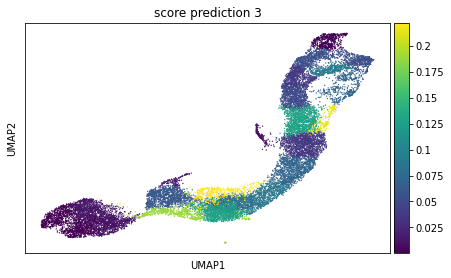

In [19]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.8", top_k=3)

In [20]:
adata_annotated.obs["celltype"].cat.categories

Index(['Beta', 'Delta', 'Ductal', 'Epsilon', 'Fev+ Alpha', 'Fev+ Beta',
       'Fev+ Delta', 'Fev+ Epsilon', 'Fev+ Pyy', 'Mat. Acinar', 'Multipotent',
       'Ngn3 High early', 'Ngn3 High late', 'Ngn3 low EP', 'Prlf. Acinar',
       'Tip', 'Trunk', 'primary Alpha', 'secondary Alpha'],
      dtype='object')

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

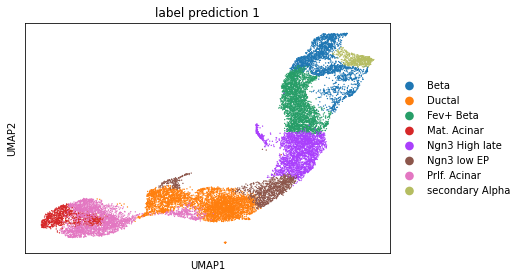

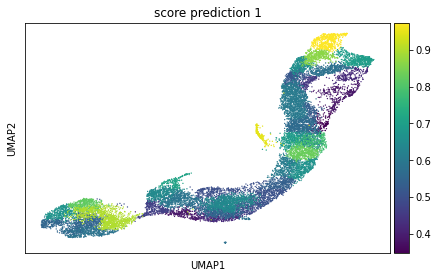

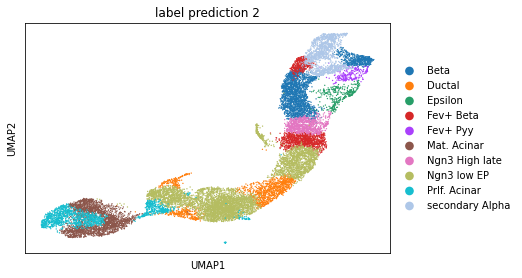

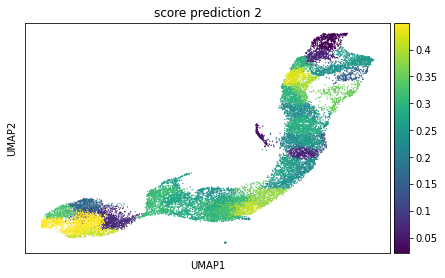

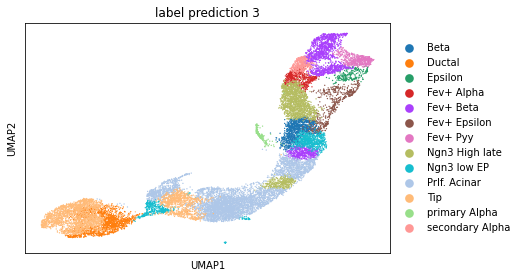

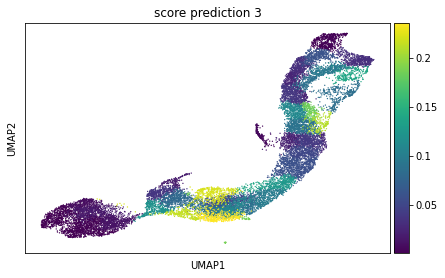

In [21]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_4.0", top_k=3)

In [22]:
labels, scores = lp.get_labels(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.4", top_k=5, return_scores=True)

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

In [24]:
labels.index = labels.index.astype(int)

In [26]:
labels.sort_index()

1                2                3                4  \
0            Ductal      Ngn3 low EP     Prlf. Acinar              Tip   
1         Fev+ Beta             Beta   Ngn3 High late       Fev+ Alpha   
2    Ngn3 High late        Fev+ Beta             Beta  Ngn3 High early   
3              Beta        Fev+ Beta  secondary Alpha       Fev+ Alpha   
4            Ductal      Ngn3 low EP     Prlf. Acinar              Tip   
5      Prlf. Acinar      Mat. Acinar           Ductal              Tip   
6    Ngn3 High late      Ngn3 low EP           Ductal     Prlf. Acinar   
7       Mat. Acinar     Prlf. Acinar              Tip           Ductal   
8       Ngn3 low EP           Ductal     Prlf. Acinar   Ngn3 High late   
9      Prlf. Acinar      Mat. Acinar           Ductal              Tip   
10   Ngn3 High late      Ngn3 low EP        Fev+ Beta     Prlf. Acinar   
11           Ductal     Prlf. Acinar              Tip      Ngn3 low EP   
12             Beta        Fev+ Beta  secondary Alpha         Fev+ Pyy   
13  secondary Alpha             Beta         Fev+ Pyy          Epsilon   
14             Beta  secondary Alpha        Fev+ Beta      Ngn3 low EP   
15             Beta          Epsilon        Fev+ Beta     Fev+ Epsilon   
16      Mat. Acinar     Prlf. Acinar              Tip      Ngn3 low EP   
17           Ductal      Ngn3 low EP     Prlf. Acinar              Tip   
18   Ngn3 High late      Ngn3 low EP             Beta           Ductal   
19             Beta            Delta         Fev+ Pyy  secondary Alpha   
20           Ductal     Prlf. Acinar      Ngn3 low EP      Mat. Acinar   

                  5  
0       Mat. Acinar  
1   secondary Alpha  
2      Fev+ Epsilon  
3          Fev+ Pyy  
4             Trunk  
5       Ngn3 low EP  
6   Ngn3 High early  
7             Trunk  
8               Tip  
9       Ngn3 low EP  
10             Beta  
11      Mat. Acinar  
12       Fev+ Alpha  
13      Ngn3 low EP  
14         Fev+ Pyy  
15   Ngn3 High late  
16           Ductal  
17      Mat. Acinar  
18    primary Alpha  
19          Epsilon  
20              Tip

In [27]:
scores.index = scores.index.astype(int)

In [28]:
scores.sort_index()

1         2         3         4         5
0   0.561190  0.303485  0.104041  0.028832  0.001434
1   0.590123  0.255078  0.098468  0.018314  0.007953
2   0.543281  0.357324  0.042929  0.014270  0.012671
3   0.632581  0.307038  0.038255  0.011316  0.004485
4   0.582808  0.327159  0.046116  0.040266  0.003318
5   0.749427  0.231345  0.009128  0.007398  0.002457
6   0.519156  0.320047  0.080863  0.067528  0.006214
7   0.549160  0.450322  0.000334  0.000159  0.000013
8   0.482839  0.405116  0.086131  0.016279  0.006083
9   0.896121  0.080257  0.010414  0.009821  0.002325
10  0.814839  0.076590  0.055099  0.025738  0.016491
11  0.367855  0.354268  0.158573  0.111892  0.005504
12  0.521484  0.202875  0.185703  0.040315  0.037932
13  0.642491  0.240188  0.059763  0.050157  0.003594
14  0.972965  0.022054  0.001476  0.000828  0.000670
15  0.308587  0.263098  0.149279  0.127288  0.070348
16  0.633271  0.366435  0.000164  0.000104  0.000026
17  0.450985  0.280487  0.224434  0.035745  0.005262
18  0.790052  0.189238  0.009380  0.004206  0.003893
19  0.553354  0.172116  0.098040  0.096834  0.032892
20  0.566944  0.229639  0.171774  0.019692  0.011477

We now have a prior idea and see whether marker gene overlap agrees with the label transfer

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-pa

<AxesSubplot:>

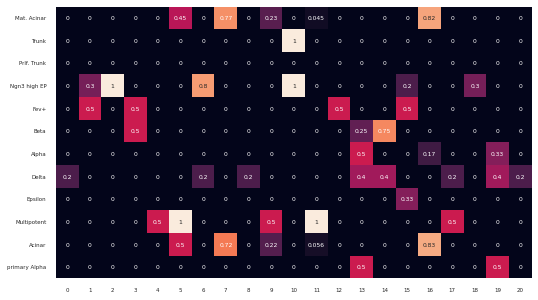

In [72]:
sc.tl.rank_genes_groups(adata, groupby='leiden_r_1.4')
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_genes_mouse, normalize='reference', key='rank_genes_groups')

sb.set(font_scale=0.5)
plt_dims = (10, 5)
fig, ax = plt.subplots(figsize=plt_dims)
sb.heatmap(cell_annotation_norm, cbar=False, annot=True, square=True, ax=ax)

<AxesSubplot:>

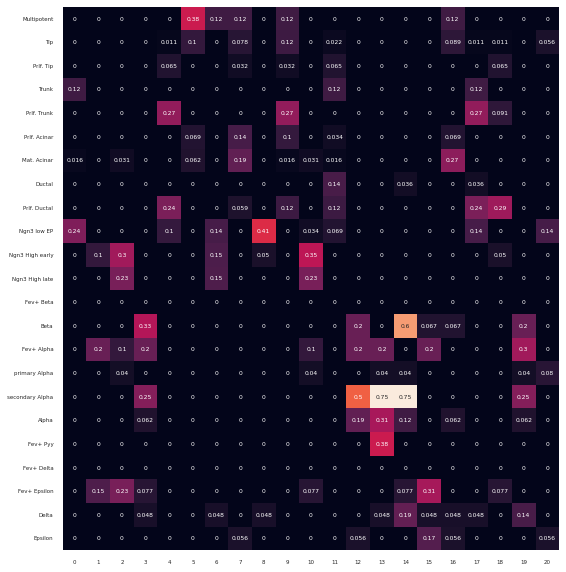

In [73]:
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_genes_mouse2, normalize='reference', key='rank_genes_groups')

sb.set(font_scale=0.5)
plt_dims = (10, 10)
fig, ax = plt.subplots(figsize=plt_dims)
sb.heatmap(cell_annotation_norm, cbar=False, annot=True, square=True, ax=ax)

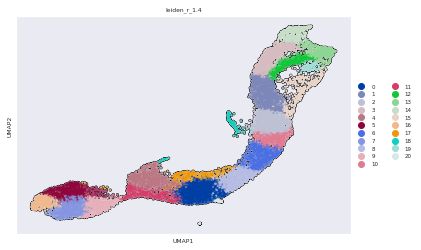

In [67]:
sc.pl.umap(adata, color=['leiden_r_1.4'], size=15, add_outline=True, alpha=0.7, outline_width=(0.3, 0.0))

In [ ]:
new_cluster_names = {
    "0": "Ngn3 low EP",
    "1": "Fev+",
    "2": "Ngn3 High late", 
    "3": "Fev+ Beta", 
    "4": "Prlf. Ductal", # not in 2019 dataset
    "5": "Multipotent", # barely present in 2019 dataset
    "6": "Ngn3 High early", 
    "7": "Prlf. Acinar", 
    "8": "Ngn3 low EP",
    "9": "Prlf. Trunk",
    "10": "Ngn3 High late", 
    "11": "Ductal", 
    "12": "Fev+ Alpha", 
    "13": "secondary Alpha",
    "14": "Beta",
    "15": "Fev+ Epsilon", 
    "16": "Acinar", 
    "17": "Ngn3 low EP", 
    "18": "Ngn3 High cycling", 
    "19": "Delta", 
    "20": "Ngn3 low EP"
}

Check cluster 5 in more detail

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

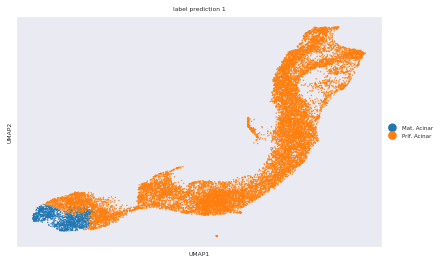

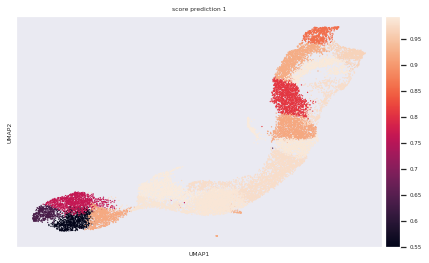

In [80]:
celltypes = ['Multipotent', "Prlf. Acinar", "Mat. Acinar"]
lp.plot_predictions(clusters_labelled={"celltype": celltypes}, clusters_unlabelled="leiden_r_1.4", top_k=1)

Check cluster 4 in more detail, as Prlf. Trunk not in 2019 dataset

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

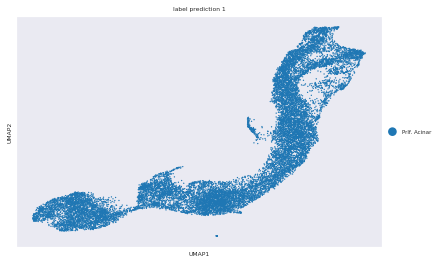

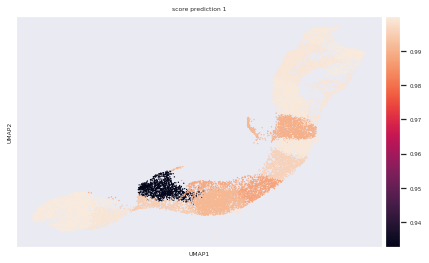

In [79]:
lp.plot_predictions(clusters_labelled={"celltype": ["Trunk", "Prlf. Acinar"]}, clusters_unlabelled="leiden_r_1.4", top_k=1)

Cluster 6 in more detail

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

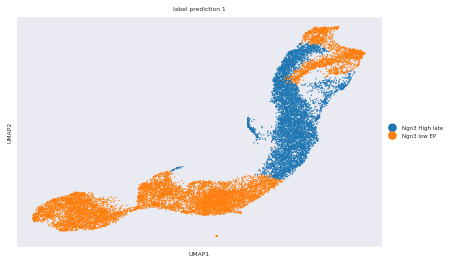

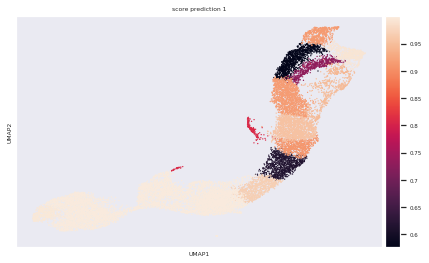

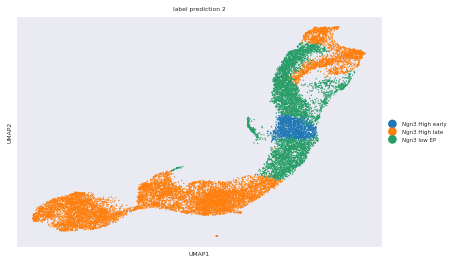

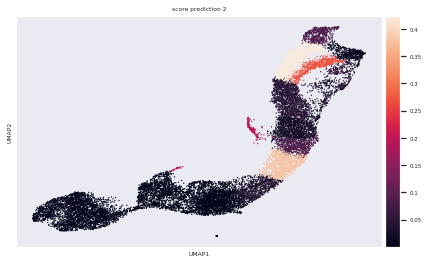

In [82]:
celltypes = ['Ngn3 High early', 'Ngn3 High late', 'Ngn3 low EP']
lp.plot_predictions(clusters_labelled={"celltype": celltypes}, clusters_unlabelled="leiden_r_1.4", top_k=2)


/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

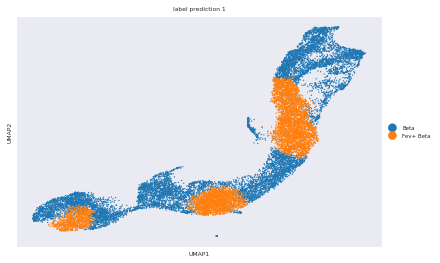

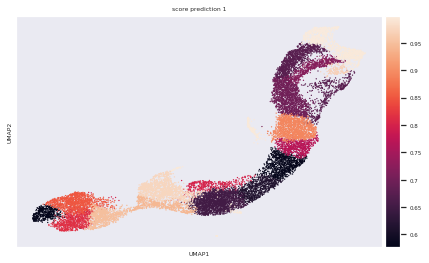

In [77]:
lp.plot_predictions(clusters_labelled={"celltype": ["Beta", "Fev+ Beta"]}, clusters_unlabelled="leiden_r_1.4", top_k=1)

In [32]:
adata.obs.columns

Index(['n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs',
       'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts',
       'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac',
       'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA',
       'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal',
       'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile',
       'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores',
       'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets',
       'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values',
       'dd_doublets_cat', 'pANN', 'DF_classifications_1',
       'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1',
    

In [34]:
adata_annotated.obs.columns

Index(['day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation',
       'G2M_score', 'S_score', 'clusters_fig3_final',
       'clusters_fig3_final_noep', 'clusters_fig4_final',
       'clusters_fig2_final', 'clusters_fig6_broad_final',
       'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'annot_1',
       'annot_2', 'celltype', 'source'],
      dtype='object')

In [13]:
adata_ann = adata_annotated[adata_annotated.obs["day"].isin(("14.5", "15.5"))].copy()

In [14]:
lp = LabelProblem(adata_ann, adata)

In [15]:
lp = lp.prepare()

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_wnn']['connectivities'] that happens to be dimensioned at n_obs×n_obs (16978×16978).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(


In [20]:
lp.problems['src', 'ref'].stage

<ProblemStage.SOLVED: 'solved'>

In [ ]:
lp = lp.solve(epsilon=10, scale_cost="mean")

In [21]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.8", top_k=3, label_umap_key="umap_unlabelled")

TypeError: _cell_transition() missing 1 required positional argument: 'target_cells'

### Prepare the filtered data

Filter for the time points we also want to annotate

In [13]:
adata_ann = adata_annotated[adata_annotated.obs["day"].isin(("14.5", "15.5"))].copy()
del adata_annotated

Unify the keys. 

In [14]:
adata.obs["day"] = adata.obs.apply(lambda x: "14.5" if x["sample"]=="E14.5" else "15.5", axis=1)

Choose the labels to use from the annotated dataset.

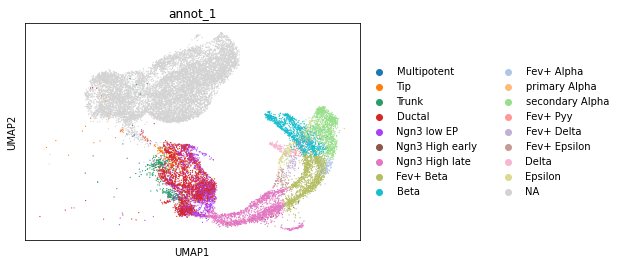

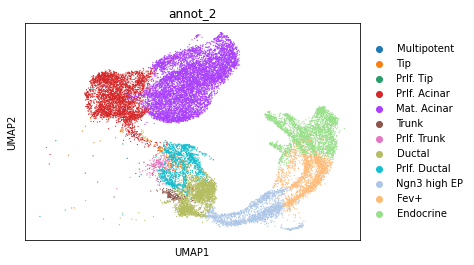

In [15]:
adata_ann.obs["annot_1"] = adata_ann.obs["clusters_fig6_alpha_final"].copy()
adata_ann.obs["annot_2"] = adata_ann.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_ann, color=["annot_1"])
sc.pl.umap(adata_ann, color=["annot_2"])

In [16]:
adata_ann.obs["celltype"] = np.where(~pd.isnull(adata_ann.obs["annot_1"]), adata_ann.obs["annot_1"], adata_ann.obs["annot_2"])

Check that all cells of the annotated data are annotated

In [17]:
pd.isnull(adata_ann.obs["celltype"]).sum()

0

We want to make the annotation based on the same genes

In [18]:
common_genes= list(set(adata_ann.var.index).intersection(adata.var.index))

In [19]:
adata_ann = adata_ann[:,common_genes]
adata = adata[:,common_genes]

To prepare the data for the merge we want to make sure we keep the right UMAPs

In [20]:
adata.obsm["X_umap_unlabelled"] = adata.obsm["X_umap"]
adata.uns["umap_unlabelled"] = adata.uns["umap"]

/tmp/ipykernel_231656/248495757.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm["X_umap_unlabelled"] = adata.obsm["X_umap"]


In [21]:
adata = adata_ann.concatenate(adata, join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Let's verify the new "batch" column which is 0 if the cell is from the annotated dataset, otherwise it's 1.

In [22]:
adata.obs["batch"].value_counts()

0    20519
1    16978
Name: batch, dtype: int64

We now create a common PCA space. 

In [23]:
sc.pp.pca(adata, n_comps=30)

In [24]:
lp = LabelProblem(adata)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")

In [25]:
lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.8, tau_b=0.95)

2022-06-20 17:52:38.862964: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 17:52:38.862998: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [26]:
adata.obs["celltype"] = adata.obs["celltype"].astype("category") # this is needed for moscot

[autoreload of moscot.problems.label_transfer._label_transfer failed: Traceback (most recent call last):
  File "/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_label_transfer.py", line 9, in <module>
    class LabelProblem(LabelMixin[K,

We can now visualise the results to get a first impression

In [27]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.8", top_k=3, label_umap_key="umap_unlabelled")

AttributeError: 'LabelProblem' object has no attribute '_cell_transition'

We see that some cell types are very dominant, this is due to them being very abundant in the annotated data set. This is why we adapt the marginals now, i.e. we reduce the weights of Ductal and Ngn3 High late cells while increasing weights of the cell types Tip, Trunk, and Fev+ Pyy as we want to see their most likely regions more clearly.

In [29]:
adata.obs["celltype"].cat.categories

Index(['Acinar', 'Beta', 'Delta', 'Ductal', 'Epsilon', 'Fev+', 'Fev+ Alpha',
       'Fev+ Beta', 'Fev+ Delta', 'Fev+ Epsilon', 'Fev+ Pyy', 'Mat. Acinar',
       'Multipotent', 'Ngn3 High cycling', 'Ngn3 High early', 'Ngn3 High late',
       'Ngn3 low EP', 'Prlf. Acinar', 'Prlf. Trunk', 'Tip', 'Trunk',
       'primary Alpha', 'secondary Alpha'],
      dtype='object')

In [28]:
lp.set_marginals("celltype", {"Ductal": 0.7, "Fev+ Beta": 0.8, "Ngn3 High late": 0.7, "Fev+ Pyy": 1.5, "Tip": 1.5, "Trunk": 1.5})

In [30]:
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1", a="annotated_marginals")
lp = lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.8, tau_b=0.95)

In [ ]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.8", top_k=3, label_umap_key="umap_unlabelled")

In [ ]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden_r_1.8", top_k=3, label_umap_key="umap_unlabelled")

In [49]:
adapted_weights = {"Ductal": 0.7, "Fev+ Beta": 0.8, "Ngn3 High late": 0.7}
'Ductal' in adapted_weights.keys()

True

In [51]:
clusters_labelled = "celltype"

In [53]:
r=adata[adata.obs[lp._batch_key]==lp._labelled_batch].obs[[clusters_labelled]]

In [54]:
r["annotated_marginals"] = 1.0

/tmp/ipykernel_47317/3119373029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["annotated_marginals"] = 1.0


In [36]:
adata_ann.obs["celltype"].unique()

array(['Beta', 'Prlf. Acinar', 'Fev+ Beta', 'Trunk', 'Ngn3 High late',
       'Ductal', 'Tip', 'Mat. Acinar', 'Ngn3 low EP', 'Fev+ Alpha',
       'Epsilon', 'Delta', 'secondary Alpha', 'Fev+ Delta',
       'Fev+ Epsilon', 'Fev+ Pyy', 'Ngn3 High early', 'Multipotent',
       'primary Alpha'], dtype=object)

In [37]:
lp = LabelProblem(adata)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")
lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.5, tau_b=1)

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp = tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


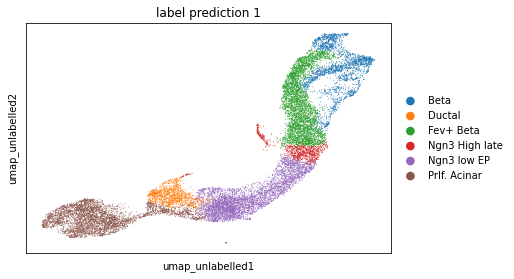

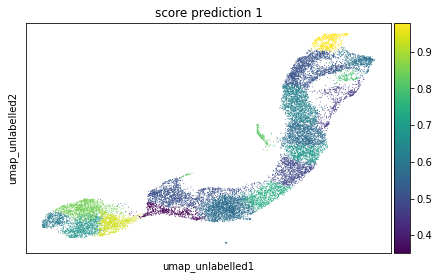

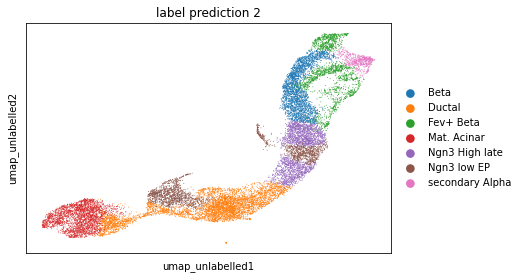

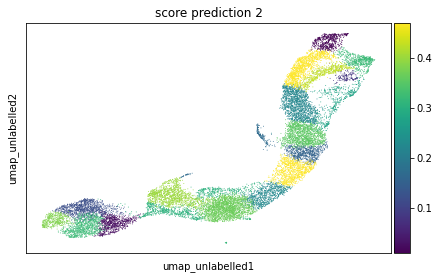

IndexError: list index out of range

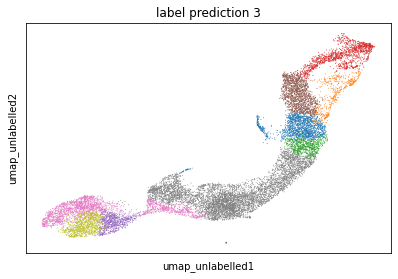

In [38]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=3, label_umap_key="umap_unlabelled")

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from moscot.problems.label_transfer import LabelProblem

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [28]:
adata_2019 = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata_2022 = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [6]:
adata_19 = adata_2019[adata_2019.obs["day"].isin(("14.5", "15.5"))].copy()
del adata_2019

In [7]:
adata_2022.obs["day"] = adata_2022.obs.apply(lambda x: "14.5" if x["sample"]=="E14.5" else "15.5", axis=1)

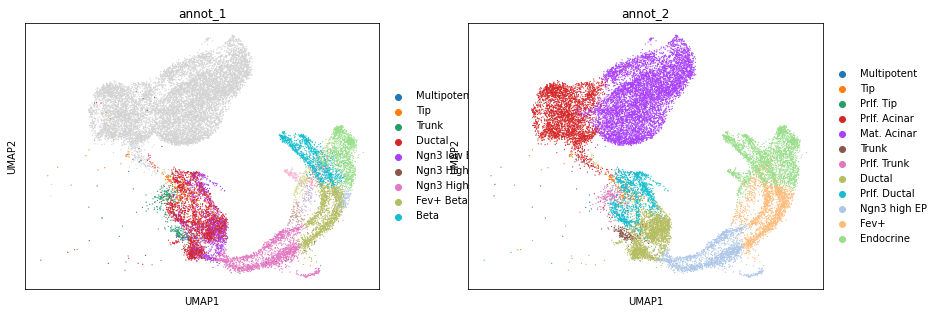

In [8]:
adata_19.obs["annot_1"] = adata_19.obs["clusters_fig6_alpha_final"].copy()
adata_19.obs["annot_2"] = adata_19.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_19, color=["annot_1", "annot_2"])

In [9]:
adata_19.obs["celltype"] = np.where(~pd.isnull(adata_19.obs["annot_1"]), adata_19.obs["annot_1"], adata_19.obs["annot_2"])

In [10]:
pd.isnull(adata_19.obs["celltype"]).sum()

0

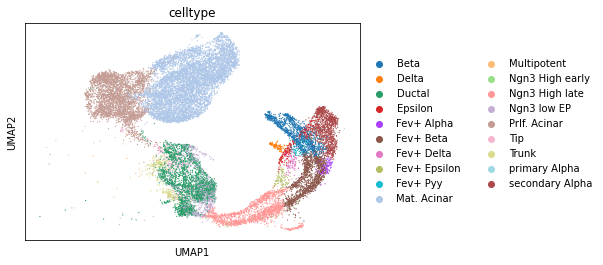

In [11]:
sc.pl.umap(adata_19, color=["celltype"])

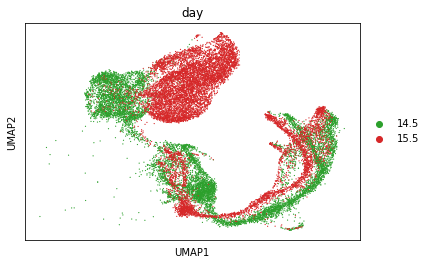

In [12]:
sc.pl.umap(adata_19, color=["day"])

In [13]:
common_genes= list(set(adata_19.var.index).intersection(adata_2022.var.index))

In [14]:
adata_19 = adata_19[:,common_genes]
adata_2022 = adata_2022[:,common_genes]

In [15]:
del adata_2022.layers

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/anndata.py:739: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self.layers = dict()


In [16]:
adata_2022

AnnData object with n_obs × n_vars = 16978 × 13255
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

In [17]:
sc.tl.umap(adata)

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


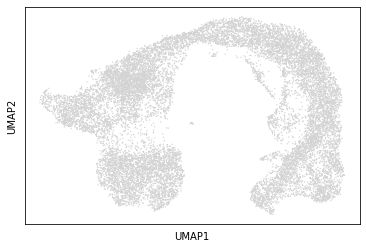

In [18]:
sc.pl.umap(adata_2022)

In [19]:
adata_2022

AnnData object with n_obs × n_vars = 16978 × 13255
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

In [20]:
adata_2022.obsm["X_umap_unlabelled"] = adata_2022.obsm["X_umap"]
adata_2022.uns["umap_unlabelled"] = adata_2022.uns["umap"]

In [21]:
adata = adata_19.concatenate(adata_2022, join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [18]:
#del adata_19
#del adata_2022

In [19]:
#adata.obs = adata.obs[["day", "batch"]]

In [20]:
#adata.var = adata.var[["n_cells-0"]]

In [21]:
#adata.write("/home/icb/dominik.klein/tmp.h5ad")

In [22]:
#del adata_2019
#del adata_2022

In [23]:
#adata_0 = adata[adata.obs["day"]=="14.5"].copy()

In [22]:
adata.obs["batch"].value_counts()

0    20519
1    16978
Name: batch, dtype: int64

In [23]:
sc.pp.pca(adata, n_comps=30)

In [24]:
lp = LabelProblem(adata)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")

In [25]:
lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.9, tau_b=0.9)

In [26]:
adata.obs["celltype"] = adata.obs["celltype"].astype("category")

In [27]:
lp.transition_matrix(clusters_source="celltype", clusters_target="celltype")

Acinar          Beta         Delta  Ductal  Epsilon  \
Acinar             0.000000e+00  0.000000e+00  0.000000e+00     0.0      0.0   
Beta               1.613475e-07  9.568013e-01  3.607485e-01     0.0      0.0   
Delta              1.771246e-08  4.302669e-03  2.350376e-01     0.0      0.0   
Ductal             2.387789e-05  1.971843e-06  2.216052e-11     0.0      0.0   
Epsilon            5.666181e-07  2.186531e-04  3.035122e-02     0.0      0.0   
Fev+               0.000000e+00  0.000000e+00  0.000000e+00     0.0      0.0   
Fev+ Alpha         6.357681e-11  1.414558e-05  2.883339e-03     0.0      0.0   
Fev+ Beta          2.441032e-08  1.601599e-03  2.861958e-02     0.0      0.0   
Fev+ Delta         5.743196e-11  6.442996e-05  4.541721e-02     0.0      0.0   
Fev+ Epsilon       1.025934e-09  2.141896e-09  3.168756e-05     0.0      0.0   
Fev+ Pyy           4.958154e-11  2.768511e-04  1.277739e-01     0.0      0.0   
Mat. Acinar        7.715920e-01  3.018708e-07  4.127248e-10     0.0      0.0   
Multipotent        8.581095e-07  4.003455e-15  4.559773e-20     0.0      0.0   
Ngn3 High cycling  0.000000e+00  0.000000e+00  0.000000e+00     0.0      0.0   
Ngn3 High early    9.777014e-09  5.179674e-10  1.275619e-12     0.0      0.0   
Ngn3 High late     5.962008e-06  8.975397e-06  1.098488e-05     0.0      0.0   
Ngn3 low EP        3.338486e-04  6.062187e-05  1.676482e-04     0.0      0.0   
Prlf. Acinar       2.275246e-01  1.252335e-06  2.628863e-08     0.0      0.0   
Prlf. Trunk        0.000000e+00  0.000000e+00  0.000000e+00     0.0      0.0   
Tip                5.170989e-04  3.616510e-05  2.248452e-04     0.0      0.0   
Trunk              1.001295e-07  1.431856e-09  8.563502e-15     0.0      0.0   
primary Alpha      1.104576e-09  2.874877e-05  4.312007e-04     0.0      0.0   
secondary Alpha    8.200819e-07  3.658234e-02  1.683023e-01     0.0      0.0   

                           Fev+    Fev+ Alpha     Fev+ Beta  Fev+ Delta  \
Acinar             0.000000e+00  0.000000e+00  0.000000e+00         0.0   
Beta               1.049220e-01  2.681856e-01  5.427701e-01         0.0   
Delta              1.180724e-04  2.219332e-03  2.489910e-03         0.0   
Ductal             3.063378e-04  2.963536e-07  4.375766e-05         0.0   
Epsilon            1.536813e-03  3.307027e-03  3.443068e-04         0.0   
Fev+               0.000000e+00  0.000000e+00  0.000000e+00         0.0   
Fev+ Alpha         5.763547e-02  9.225178e-02  3.687823e-02         0.0   
Fev+ Beta          7.564477e-01  2.450919e-01  3.102449e-01         0.0   
Fev+ Delta         8.331666e-03  2.312320e-03  3.078578e-03         0.0   
Fev+ Epsilon       1.048503e-02  4.003393e-05  3.087271e-05         0.0   
Fev+ Pyy           1.724610e-03  2.742280e-02  4.754253e-03         0.0   
Mat. Acinar        9.161584e-04  6.708238e-09  6.473788e-04         0.0   
Multipotent        3.470687e-11  4.461154e-15  2.346080e-07         0.0   
Ngn3 High cycling  0.000000e+00  0.000000e+00  0.000000e+00         0.0   
Ngn3 High early    2.589132e-03  1.879898e-08  1.376232e-08         0.0   
Ngn3 High late     3.857364e-02  3.550958e-04  1.245800e-04         0.0   
Ngn3 low EP        9.684684e-04  3.815850e-04  3.320288e-05         0.0   
Prlf. Acinar       1.021358e-03  7.289459e-07  2.703763e-03         0.0   
Prlf. Trunk        0.000000e+00  0.000000e+00  0.000000e+00         0.0   
Tip                6.121393e-05  3.374753e-04  1.559473e-04         0.0   
Trunk              7.709205e-07  9.969555e-10  6.137832e-06         0.0   
primary Alpha      3.492044e-03  3.493118e-04  1.360032e-04         0.0   
secondary Alpha    1.086954e-02  3.577447e-01  9.555780e-02         0.0   

                   Fev+ Epsilon  ...  Ngn3 High cycling  Ngn3 High early  \
Acinar             0.000000e+00  ...       0.000000e+00     0.000000e+00   
Beta               1.257257e-01  ...       5.460317e-03     3.004914e-03   
Delta              7.733928e-03  ...       3.667976e-08     1.465665e-04   

In [28]:
preds,scores = lp.get_labels(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=5, return_values=True)
preds 

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


1                2                3               4  \
0            Ductal      Ngn3 low EP     Prlf. Acinar             Tip   
1         Fev+ Beta             Beta       Fev+ Alpha  Ngn3 High late   
2    Ngn3 High late        Fev+ Beta             Beta    Fev+ Epsilon   
3              Beta        Fev+ Beta  secondary Alpha      Fev+ Alpha   
4            Ductal      Ngn3 low EP              Tip    Prlf. Acinar   
5      Prlf. Acinar      Mat. Acinar           Ductal             Tip   
6    Ngn3 High late      Ngn3 low EP           Ductal    Prlf. Acinar   
7       Mat. Acinar     Prlf. Acinar              Tip          Ductal   
8            Ductal      Ngn3 low EP   Ngn3 High late    Prlf. Acinar   
9      Prlf. Acinar      Mat. Acinar              Tip          Ductal   
10   Ngn3 High late        Fev+ Beta             Beta     Ngn3 low EP   
11           Ductal     Prlf. Acinar              Tip     Ngn3 low EP   
12  secondary Alpha             Beta        Fev+ Beta      Fev+ Alpha   
13  secondary Alpha             Beta          Epsilon        Fev+ Pyy   
14             Beta  secondary Alpha            Delta       Fev+ Beta   
15          Epsilon     Fev+ Epsilon             Beta       Fev+ Beta   
16      Mat. Acinar     Prlf. Acinar              Tip     Ngn3 low EP   
17           Ductal      Ngn3 low EP     Prlf. Acinar             Tip   
18   Ngn3 High late      Ngn3 low EP    primary Alpha            Beta   
19             Beta            Delta  secondary Alpha        Fev+ Pyy   
20           Ductal      Ngn3 low EP     Prlf. Acinar     Mat. Acinar   

                  5  
0             Trunk  
1   secondary Alpha  
2   Ngn3 High early  
3          Fev+ Pyy  
4             Trunk  
5       Ngn3 low EP  
6   Ngn3 High early  
7             Trunk  
8               Tip  
9             Trunk  
10  Ngn3 High early  
11      Mat. Acinar  
12         Fev+ Pyy  
13            Delta  
14         Fev+ Pyy  
15       Fev+ Delta  
16           Ductal  
17            Trunk  
18           Ductal  
19       Fev+ Delta  
20              Tip

In [134]:
adata.obs

day  n_counts  log_counts  n_genes   mt_frac  \
AAACCTGAGATCCCGC-1-2-0  14.5    4581.0    8.429672     2166  0.029906   
AAACCTGAGCAGGTCA-1-2-0  14.5   25506.0   10.146669     4735  0.023563   
AAACCTGCAATGAATG-1-2-0  14.5   27924.0   10.237242     4974  0.021021   
AAACCTGCAATTGCTG-1-2-0  14.5   10649.0    9.273221     3476  0.022068   
AAACCTGCACAGAGGT-1-2-0  14.5    7164.0    8.876823     3032  0.026661   
...                      ...       ...         ...      ...       ...   
TTTGTGTTCTTGTTCG-1-1-1  15.5    9644.0    9.174091     4703  0.009851   
TTTGTTGGTATTGAGT-1-1-1  15.5    8914.0    9.095378     3772  0.005160   
TTTGTTGGTCCTAAGA-1-1-1  15.5    9689.0    9.178746     4540  0.003922   
TTTGTTGGTTAACAGT-1-1-1  15.5    9570.0    9.166389     4502  0.010449   
TTTGTTGGTTGTTGCT-1-1-1  15.5    8930.0    9.097172     3458  0.012542   

                       proliferation  G2M_score   S_score clusters_fig3_final  \
AAACCTGAGATCCCGC-1-2-0   Non-Cycling  -0.241338 -0.274599           Endocrine   
AAACCTGAGCAGGTCA-1-2-0       Cycling   0.333951  0.383954        Prlf. Acinar   
AAACCTGCAATGAATG-1-2-0       Cycling   0.315563  0.469532        Prlf. Acinar   
AAACCTGCAATTGCTG-1-2-0   Non-Cycling  -0.210764 -0.201929           Endocrine   
AAACCTGCACAGAGGT-1-2-0   Non-Cycling  -0.235179 -0.200766                Fev+   
...                              ...        ...       ...                 ...   
TTTGTGTTCTTGTTCG-1-1-1   Non-Cycling  -0.224130 -0.026287                 NaN   
TTTGTTGGTATTGAGT-1-1-1   Non-Cycling  -0.209148 -0.310679                 NaN   
TTTGTTGGTCCTAAGA-1-1-1   Non-Cycling  -0.262677 -0.185326                 NaN   
TTTGTTGGTTAACAGT-1-1-1       Cycling   0.092528 -0.051415                 NaN   
TTTGTTGGTTGTTGCT-1-1-1   Non-Cycling  -0.206860 -0.147330                 NaN   

                       clusters_fig3_final_noep  ... leiden_r1.2 leiden_r1.3  \
AAACCTGAGATCCCGC-1-2-0                Endocrine  ...         NaN         NaN   
AAACCTGAGCAGGTCA-1-2-0             Prlf. Acinar  ...         NaN         NaN   
AAACCTGCAATGAATG-1-2-0             Prlf. Acinar  ...         NaN         NaN   
AAACCTGCAATTGCTG-1-2-0                Endocrine  ...         NaN         NaN   
AAACCTGCACAGAGGT-1-2-0                     Fev+  ...         NaN         NaN   
...                                         ...  ...         ...         ...   
TTTGTGTTCTTGTTCG-1-1-1                      NaN  ...           0           0   
TTTGTTGGTATTGAGT-1-1-1                      NaN  ...           8           9   
TTTGTTGGTCCTAAGA-1-1-1                      NaN  ...           0           0   
TTTGTTGGTTAACAGT-1-1-1                      NaN  ...           1           1   
TTTGTTGGTTGTTGCT-1-1-1                      NaN  ...          14          15   

                       leiden_r1.4 leiden_r1.5 label_prediction_1  \
AAACCTGAGATCCCGC-1-2-0         NaN         NaN                NaN   
AAACCTGAGCAGGTCA-1-2-0         NaN         NaN                NaN   
AAACCTGCAATGAATG-1-2-0         NaN         NaN                NaN   
AAACCTGCAATTGCTG-1-2-0         NaN         NaN                NaN   
AAACCTGCACAGAGGT-1-2-0         NaN         NaN                NaN   
...                            ...         ...                ...   
TTTGTGTTCTTGTTCG-1-1-1           0           0             Ductal   
TTTGTTGGTATTGAGT-1-1-1           8           8             Ductal   
TTTGTTGGTCCTAAGA-1-1-1           0           0             Ductal   
TTTGTTGGTTAACAGT-1-1-1           5          11       Prlf. Acinar   
TTTGTTGGTTGTTGCT-1-1-1          15          16            Epsilon   

                       label_prediction_2 label_prediction_3  \
AAACCTGAGATCCCGC-1-2-0                NaN                NaN   
AAACCTGAGCAGGTCA-1-2-0                NaN                NaN   
AAACCTGCAATGAATG-1-2-0                NaN                NaN   
AAACCTGCAATTGCTG-1-2-0                NaN                NaN   
AAACCTGCACAGAGGT-1-2-0                NaN                NaN   
.

In [145]:
adata.obs["score_prediction_1"]

AAACCTGAGATCCCGC-1-2-0         NaN
AAACCTGAGCAGGTCA-1-2-0         NaN
AAACCTGCAATGAATG-1-2-0         NaN
AAACCTGCAATTGCTG-1-2-0         NaN
AAACCTGCACAGAGGT-1-2-0         NaN
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.646280
TTTGTTGGTATTGAGT-1-1-1    0.449448
TTTGTTGGTCCTAAGA-1-1-1    0.646280
TTTGTTGGTTAACAGT-1-1-1    0.566572
TTTGTTGGTTGTTGCT-1-1-1    0.395655
Name: score_prediction_1, Length: 37497, dtype: float64

In [146]:
adata.obs["label_prediction_1"]

AAACCTGAGATCCCGC-1-2-0             NaN
AAACCTGAGCAGGTCA-1-2-0             NaN
AAACCTGCAATGAATG-1-2-0             NaN
AAACCTGCAATTGCTG-1-2-0             NaN
AAACCTGCACAGAGGT-1-2-0             NaN
                              ...     
TTTGTGTTCTTGTTCG-1-1-1          Ductal
TTTGTTGGTATTGAGT-1-1-1          Ductal
TTTGTTGGTCCTAAGA-1-1-1          Ductal
TTTGTTGGTTAACAGT-1-1-1    Prlf. Acinar
TTTGTTGGTTGTTGCT-1-1-1         Epsilon
Name: label_prediction_1, Length: 37497, dtype: category
Categories (8, object): ['Beta', 'Ductal', 'Epsilon', 'Fev+ Beta', 'Mat. Acinar', 'Ngn3 High late', 'Prlf. Acinar', 'secondary Alpha']

In [143]:
adata.obs["tmp"] = adata.obs["score_prediction_1"].copy()

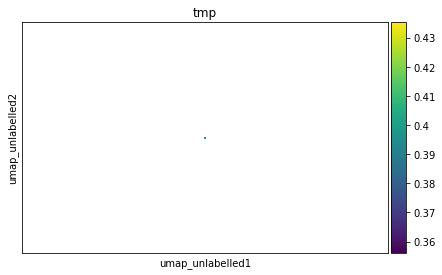

In [147]:
sc.pl.scatter(adata, basis="umap_unlabelled", color=["tmp"])

In [ ]:
sc.pl.umap()

In [51]:
adata.obs["tmp3"] = adata.obs["score_prediction_2"]

In [52]:
adata.obs[["tmp3"]] = adata.obs[["tmp3"]].fillna(0)

In [53]:
adata.obs["tmp3"]

AAACCTGAGATCCCGC-1-2-0    0.000000
AAACCTGAGCAGGTCA-1-2-0    0.000000
AAACCTGCAATGAATG-1-2-0    0.000000
AAACCTGCAATTGCTG-1-2-0    0.000000
AAACCTGCACAGAGGT-1-2-0    0.000000
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.269939
TTTGTTGGTATTGAGT-1-1-1    0.444686
TTTGTTGGTCCTAAGA-1-1-1    0.269939
TTTGTTGGTTAACAGT-1-1-1    0.416674
TTTGTTGGTTGTTGCT-1-1-1    0.130411
Name: tmp3, Length: 37497, dtype: float64

In [50]:

np.isnan(adata.obs["score_prediction_2"])

AAACCTGAGATCCCGC-1-2-0     True
AAACCTGAGCAGGTCA-1-2-0     True
AAACCTGCAATGAATG-1-2-0     True
AAACCTGCAATTGCTG-1-2-0     True
AAACCTGCACAGAGGT-1-2-0     True
                          ...  
TTTGTGTTCTTGTTCG-1-1-1    False
TTTGTTGGTATTGAGT-1-1-1    False
TTTGTTGGTCCTAAGA-1-1-1    False
TTTGTTGGTTAACAGT-1-1-1    False
TTTGTTGGTTGTTGCT-1-1-1    False
Name: score_prediction_2, Length: 37497, dtype: bool

In [41]:
adata.obs["label_prediction_2"]

AAACCTGAGATCCCGC-1-2-0             NaN
AAACCTGAGCAGGTCA-1-2-0             NaN
AAACCTGCAATGAATG-1-2-0             NaN
AAACCTGCAATTGCTG-1-2-0             NaN
AAACCTGCACAGAGGT-1-2-0             NaN
                              ...     
TTTGTGTTCTTGTTCG-1-1-1     Ngn3 low EP
TTTGTTGGTATTGAGT-1-1-1     Ngn3 low EP
TTTGTTGGTCCTAAGA-1-1-1     Ngn3 low EP
TTTGTTGGTTAACAGT-1-1-1     Mat. Acinar
TTTGTTGGTTGTTGCT-1-1-1    Fev+ Epsilon
Name: label_prediction_2, Length: 37497, dtype: category
Categories (8, object): ['Beta', 'Delta', 'Fev+ Beta', 'Fev+ Epsilon', 'Mat. Acinar', 'Ngn3 low EP', 'Prlf. Acinar', 'secondary Alpha']

In [47]:
adata.obs["tmp_2"] = adata.obs["score_prediction_2"].astype("str")

In [38]:
adata.obs["tmp"] = adata.obs['score_prediction_2'].astype("str")

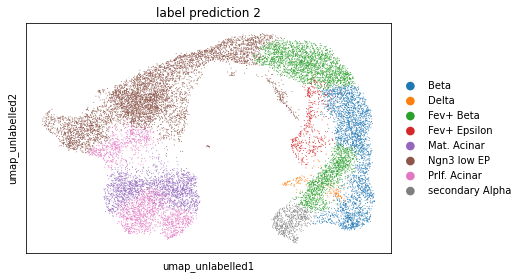

In [37]:
a = sc.pl.scatter(adata, show=False, basis="umap_unlabelled", color="label_prediction_2")

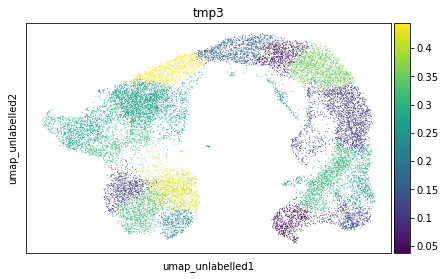

In [54]:
a = sc.pl.scatter(adata, show=False, basis="umap_unlabelled", color="tmp3")

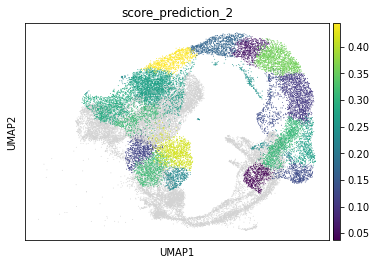

In [31]:
sc.pl.umap(adata, color="score_prediction_2")

In [56]:
adata.obs["score_prediction_1"]

AAACCTGAGATCCCGC-1-2-0         NaN
AAACCTGAGCAGGTCA-1-2-0         NaN
AAACCTGCAATGAATG-1-2-0         NaN
AAACCTGCAATTGCTG-1-2-0         NaN
AAACCTGCACAGAGGT-1-2-0         NaN
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.646281
TTTGTTGGTATTGAGT-1-1-1    0.449448
TTTGTTGGTCCTAAGA-1-1-1    0.646281
TTTGTTGGTTAACAGT-1-1-1    0.566572
TTTGTTGGTTGTTGCT-1-1-1    0.395655
Name: score_prediction_1, Length: 37497, dtype: float64

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


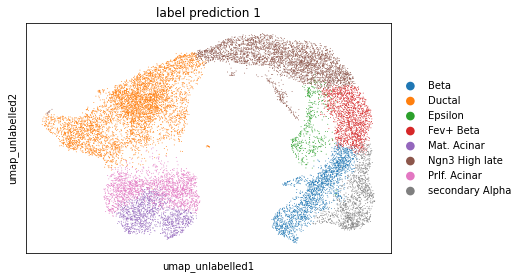

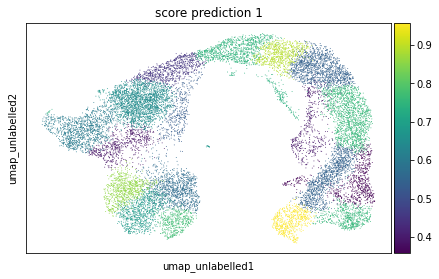

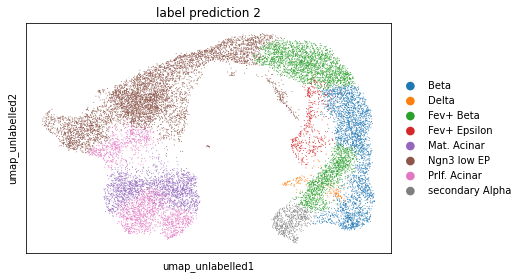

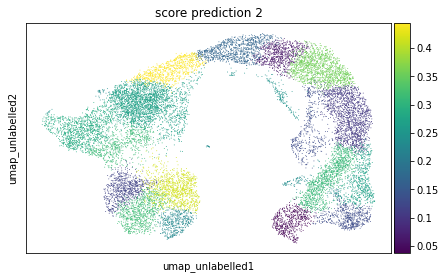

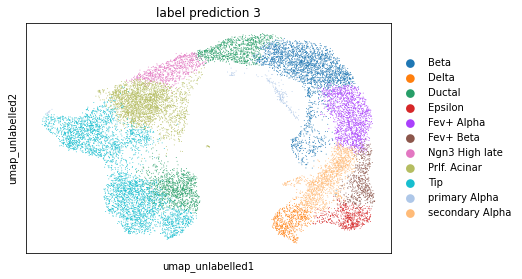

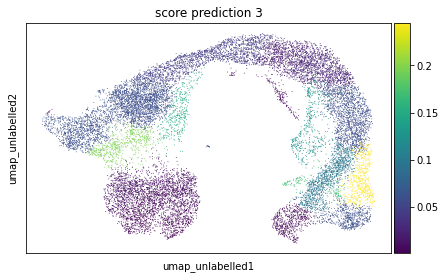

In [59]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=3, label_umap_key="umap_unlabelled")

In [66]:
#neighbors = sc.pp.neighbors(adata[adata.obs["batch"]=="1"], copy=True)

In [38]:
adata_22 = adata[adata.obs["batch"]=="1"]

In [39]:
sc.pp.neighbors(adata_22)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [40]:
sc.tl.umap(adata_22)

In [41]:
adata_22.obs["celltype"]

AAACAGCCAACAGCCT-1-0-1          Fev+ Beta
AAACAGCCAACCCTCC-1-0-1         Fev+ Alpha
AAACAGCCACCTGTAA-1-0-1        Prlf. Trunk
AAACAGCCACTAAGCC-1-0-1          Fev+ Beta
AAACAGCCAGGATAAC-1-0-1    Ngn3 High early
                               ...       
TTTGTGTTCTTGTTCG-1-1-1        Ngn3 low EP
TTTGTTGGTATTGAGT-1-1-1        Ngn3 low EP
TTTGTTGGTCCTAAGA-1-1-1        Ngn3 low EP
TTTGTTGGTTAACAGT-1-1-1        Multipotent
TTTGTTGGTTGTTGCT-1-1-1       Fev+ Epsilon
Name: celltype, Length: 16978, dtype: category
Categories (15, object): ['Acinar', 'Beta', 'Delta', 'Fev+', ..., 'Ngn3 low EP', 'Prlf. Acinar', 'Prlf. Trunk', 'secondary Alpha']

In [ ]:
adata_22.obs.loc[:, "leiden"]

In [43]:
adata_22.obs["predictions"] = adata_22.obs.apply(lambda x: preds.loc[x["leiden"], 1], axis=1)

In [44]:
adata_22.obs["predictions_confidence"] = adata_22.obs.apply(lambda x: scores.loc[int(x["leiden"]), 1], axis=1)

In [48]:
adata_22.obs.apply(lambda x: scores.loc[int(x["leiden"]), 1], axis=1)

AAACAGCCAACAGCCT-1-0-1    0.311334
AAACAGCCAACCCTCC-1-0-1    0.294553
AAACAGCCACCTGTAA-1-0-1    0.852982
AAACAGCCACTAAGCC-1-0-1    0.311334
AAACAGCCAGGATAAC-1-0-1    0.252656
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.376237
TTTGTTGGTATTGAGT-1-1-1    0.324184
TTTGTTGGTCCTAAGA-1-1-1    0.376237
TTTGTTGGTTAACAGT-1-1-1    0.885252
TTTGTTGGTTGTTGCT-1-1-1    0.193085
Length: 16978, dtype: float64

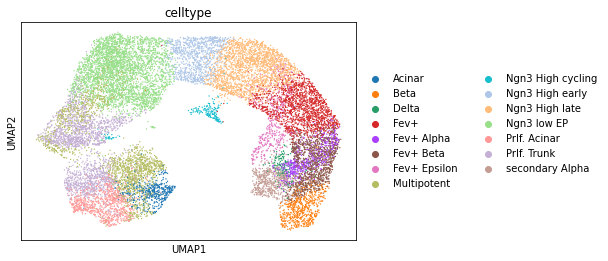

In [89]:
sc.pl.umap(adata_22, color="celltype")

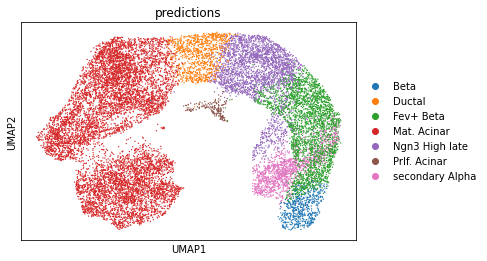

In [46]:
sc.pl.umap(adata_22, color="predictions")

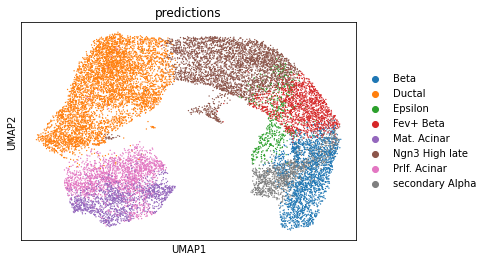

In [90]:
# linear
sc.pl.umap(adata_22, color="predictions")

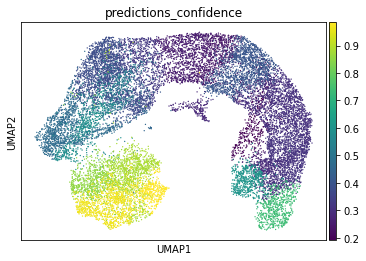

In [47]:
sc.pl.umap(adata_22, color="predictions_confidence")

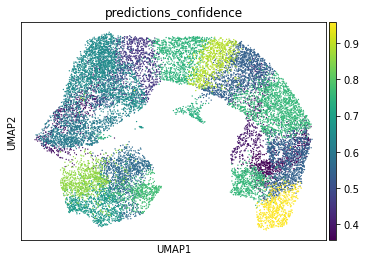

In [98]:
# linaer
sc.pl.umap(adata_22, color="predictions_confidence")